<a href="https://colab.research.google.com/github/rajhazarika85/python/blob/main/Exploratory_Data_Analysis_US_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import data

In [39]:
! pip install -q kaggle
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"rajhazarika","key":"2a6b7991015b0fb8abf5fd4b6d86302f"}'}

In [40]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [41]:
! kaggle datasets download -d sobhanmoosavi/us-accidents




us-accidents.zip: Skipping, found more recently modified local copy (use --force to force download)


In [42]:
! mkdir data

mkdir: cannot create directory ‘data’: File exists


In [43]:
! unzip us-accidents.zip

Archive:  us-accidents.zip
  inflating: US_Accidents_Dec20_Updated.csv  


In [44]:
import shutil
import os

directory = '/content/'
dest_dir = '/content/data/'
for filename in os.listdir(directory):
  if filename.endswith(".csv"): 
    print(filename)
    shutil.move(directory + filename, dest_dir + filename )


US_Accidents_Dec20_Updated.csv


In [45]:
data_path = '/content/data/US_Accidents_Dec20_Updated.csv'


# Import library

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [47]:
df = pd.read_csv(data_path)
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


# Preparation and cleaning

In [48]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### Missing values

In [49]:
missing_col = df.isna().sum().sort_values(ascending=False) / len(df)

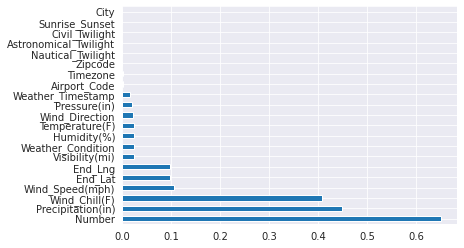

In [50]:
missing_col[missing_col !=0].plot(kind='barh')

### Remove columns that has lots of missing values

In [51]:
df.drop(columns=['Number', 'Precipitation(in)'],inplace=True)


# Exploratory and Visualization

### Analysis with Cities


In [52]:
# Top cities with accident
cities_by_accident = df.City.value_counts()
cities_by_accident[:10]

Los Angeles    68411
Houston        68265
Charlotte      56176
Miami          49965
Dallas         48525
Austin         38808
Raleigh        31355
Atlanta        29244
Sacramento     28984
Orlando        28092
Name: City, dtype: int64

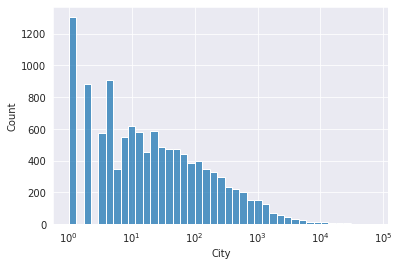

In [53]:
# Distribution of accidents
sns.set_style('darkgrid')
# Using log scale for skewness
sns.histplot(cities_by_accident, log_scale=True)

### Analysis with time vs accident

In [54]:
# Start time
df.Start_Time = pd.to_datetime(df.Start_Time)
df.End_Time = pd.to_datetime(df.End_Time)

In [55]:
# Get % of accident in what hour
df['start_hour'] = df.Start_Time.dt.hour


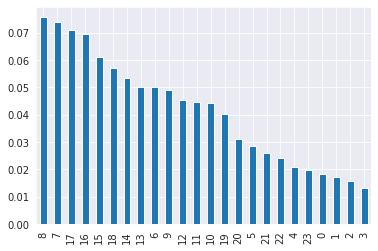

In [56]:
(df['start_hour'].value_counts() / len(df)).plot(kind='bar')

- High accident between 7 to 10 am

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


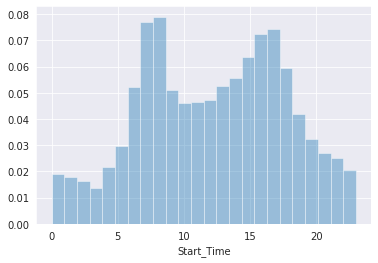

In [57]:
sns.distplot(df.Start_Time.dt.hour,bins=24,kde=False,norm_hist= True)

### Analysis with days

- Less accident on weekends

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


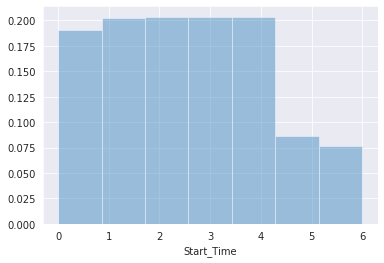

In [58]:
sns.distplot(df.Start_Time.dt.dayofweek,bins=7,kde=False,norm_hist= True)

### If accident hours in weekday same as weekend?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Weekend')

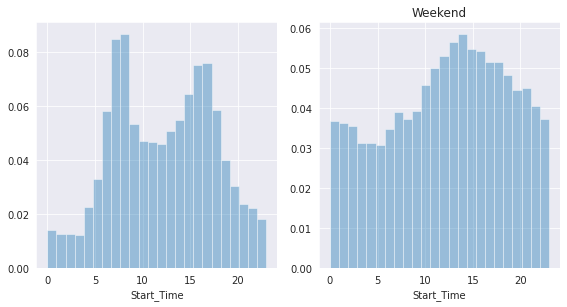

In [59]:
fig, axes = plt.subplots(figsize=(8, 4) , nrows = 1, ncols = 2)
fig.tight_layout()
ax = axes[0]

# Monday
monday = df.Start_Time[df.Start_Time.dt.dayofweek==0]
sns.distplot(monday.dt.hour,bins=24,kde=False,norm_hist= True,ax=ax)
plt.title('Monday')

ax = axes[1]
otherday = df.Start_Time[df.Start_Time.dt.dayofweek==6]
sns.distplot(otherday.dt.hour,bins=24,kde=False,norm_hist= True,ax=ax)
plt.title('Weekend')

### Month analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


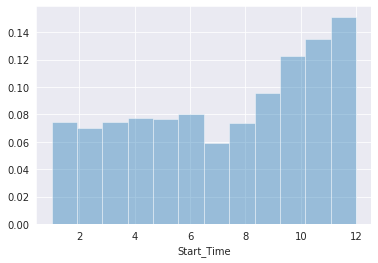

In [60]:
sns.distplot(df.Start_Time.dt.month,bins=12,kde=False,norm_hist= True)

### Start latitude and Longitude

In [61]:
import folium

In [62]:
lat ,lng = df.Start_Lat[0],df.Start_Lng[0]

In [63]:
map = folium.Map()
for idx, val in df.iloc[0:100].iterrows():
  lat = val['Start_Lat']
  lng = val['Start_Lng']
  marker = folium.Marker((lat, lng))
  marker.add_to(map)
map

### Heatmap on the map

In [67]:
from folium.plugins import HeatMap
map = folium.Map()
newdf = df.iloc[0:10,:]
HeatMap(zip(newdf.Start_Lat, newdf.Start_Lng)).add_to(map)
map

# Summary

- Over 1200 cities have reported only 1 accident
- \# of accident per city decreases exponentially
